##Pretraga s ograničenjima (CSP)

Problem pretrage s ograničenjima (engl. Constraint Satisfaction Problem - CSP) je matematički problem definiran skupom varijabli, domenama za svaku varijablu i skupom ograničenja koja te varijable moraju zadovoljiti. Cilj CSP-a je pronaći dodjelu vrijednosti svim varijablama iz njihovih domena tako da su sva ograničenja zadovoljena.Takva dodjela predstavlja validno rješenje CSP-a.

### Ključni elementi CSP-a:
1.  **Varijable (Variables)**: Skup entiteta kojima se dodjeljuju vrijednosti unutar domene.
2.  **Domeni (Domains)**: Za svaku varijablu, skup svih mogućih vrijednosti koje može poprimiti.
3.  **Ograničenja (Constraints)**: Skup uvjeta koji moraju biti zadovoljeni dodijeljenim vrijednostima varijabli. Ograničenja mogu biti unarna (odnose se na jednu varijablu), binarna (odnose se na dvije varijable) ili višestruka (odnose se na više varijabli).

### Vrste ograničenja:
*   **Hard Constraints (Tvrda ograničenja)**: Ona koja se moraju bezuvjetno zadovoljiti. Ako se prekrši i jedno tvrdo ograničenje, rješenje nije validno.
*   **Soft Constraints (Meka ograničenja)**: Ona koja se poželjno trebaju zadovoljiti, ali njihovo kršenje ne poništava rješenje, već ga čini manje optimalnim. Često se koriste za evaluaciju "kvalitete" rješenja i odabir najboljeg među valjanima odnosno evaluaciju.

## Praktična primjena CSP-a: Raspored ispita kolegija

U ovom projektu, problem raspoređivanja ispita kolegija po terminima formuliramo kao CSP. Cilj je dodijeliti svaki kolegij u jedan od dostupnih vremenskih termina tako da se zadovolje definirana ograničenja i minimizira "loš" raspored.

### Elementi CSP-a u ovom projektu:
1.  **Varijable**: Svaki kolegij (npr. "Numerička matematika", "UUI", "HCI", itd.) predstavlja jednu varijablu.
2.  **Domeni**: Za svaki kolegij, domena su svi dostupni vremenski termini (npr. "Pon 9", "Pon 12", "Uto 9", "Uto 12", "Sri 9", "Sri 12").
3.  **Ograničenja**:
    *   **Tvrda ograničenja (Hard Constraints)**: Definirana su "konfliktima" između kolegija. Dva kolegija koja su u konfliktu (tj. studenti ih slušaju zajedno) ne smiju biti u istom vremenskom terminu. To osigurava da nema preklapanja za studente koji pohađaju oba kolegija.
    *   **Meka ograničenja (Soft Constraints)**: Koriste se za optimizaciju rasporeda. Primjeri u ovom projektu uključuju:
        *   **Penalizacija** ako su "UUI" i "Numerička matematika" isti dan (smatraju se težim kolegijima).
        *   **Penalizacija** ako su "HCI" i "Baze podataka" isti dan (studenti često slušaju oba).

### Proces rješavanja problema:
1.  **Definicija problema**: Varijable, domene i tvrda ograničenja se modeliraju pomoću biblioteke `python-constraint`.
2.  **Pronalaženje rješenja**: Biblioteka pronalazi sva moguća dodjeljivanja termina kolegijima koja zadovoljavaju **sva tvrda ograničenja**.
3.  **Evaluacija rješenja**: Svako pronađeno rješenje se zatim ocjenjuje (scorira) na temelju mekih ograničenja, pri čemu niži "score" (penalizacija) označava bolje rješenje.
4.  **Odabir najboljeg rješenja**: Rješenje s najnižim scoreom se smatra optimalnim rasporedom prema definiranim mekim ograničenjima.

### Instalacija potrebnih biblioteka

Za početak je potrebno instalirati sve Python biblioteke koje su nam potrebne za rješavanje CSP problema, vizualizaciju grafa i obradu podataka:
*   `python-constraint`: Glavna biblioteka za definiranje i rješavanje problema s ograničenjima.
*   `networkx`: Za kreiranje neusmjerenog grafa, što ćemo koristiti za vizualizaciju konflikata.
*   `pandas`: Za rad s tabličnim podacima (DataFrames), što je potrebno za formatirani prikaz rješenja.
*   `matplotlib`: Za crtanje i vizualizaciju, zajedno s `networkx`.

In [ ]:
!pip install python-constraint networkx pandas matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24061 sha256=73b12f238415527ecc2a8e400ce4c9f97cb7eb0c44f9fcf6955c6fa26755a3d1
  Stored in directory: /root/.cache/pip/wheels/c1/d2/3d/082849b61a9c6de02d4a7c8a402c224640f08d8a971307b92b
Successfully built python-constraint


### Uvoz biblioteka

Potrebno je uvesti potrebne klase i module iz instaliranih biblioteka kako bi ih mogli koristiti u daljnjem kodu.

In [ ]:
from constraint import Problem
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Definicija osnovnih elemenata CSP-a

Ovdje definiramo ključne elemente Constraint Satisfaction Problema za raspoređivanje ispita:
*   `courses`: Lista kolegija koji predstavljaju **varijable** u našem CSP-u, u ovom slučaju su to kolegiji.
*   `timeslots`: Lista dostupnih vremenskih termina koji predstavljaju **domene** za svaku varijablu (kolegij).
*   `conflicts`: Lista parova kolegija koji su u konfliktu (tj. ne smiju biti u istom terminu jer ih slušaju isti studenti). Ovi konflikti će biti modelirani kao **tvrda ograničenja**.

In [ ]:
# Varijable CSP problema (kolegiji)
courses = ["Numerička matematika", "UUI", "HCI", "SPA", "Baze podataka", "Računalne mreže"]

# Domena (dostupni vremenski termini) - svaka varijabla na raspolaganju ima ovaj set termina
timeslots = ["Pon 9", "Pon 12", "Uto 9", "Uto 12", "Sri 9", "Sri 12"]

# Konflikti = parovi kolegija koje studenti slušaju zajedno
# (ne smiju biti u istom terminu)
conflicts = [
    ("Numerička matematika", "UUI"),
    ("Numerička matematika", "SPA"),
    ("UUI", "HCI"),
    ("HCI", "Baze podataka"),
    ("SPA", "Baze podataka"),
    ("Računalne mreže", "Baze podataka"),
    ("Računalne mreže", "UUI")
]

print("Kolegiji:", courses)
print("Termini:", timeslots)
print("Konflikti:", conflicts)

Kolegiji: ['Numerička matematika', 'UUI', 'HCI', 'SPA', 'Baze podataka', 'Računalne mreže']
Termini: ['Pon 9', 'Pon 12', 'Uto 9', 'Uto 12', 'Sri 9', 'Sri 12']
Konflikti: [('Numerička matematika', 'UUI'), ('Numerička matematika', 'SPA'), ('UUI', 'HCI'), ('HCI', 'Baze podataka'), ('SPA', 'Baze podataka'), ('Računalne mreže', 'Baze podataka'), ('Računalne mreže', 'UUI')]


### Vizualizacija konflikata

 Koristi se biblioteka `networkx` za kreiranje grafa konflikata koji je predstavljen kao neusmjereni graf. Svaki kolegij je čvor (node), a svaka veza (edge) između dva čvora predstavlja konflikt. Vizualizacija grafa nam pomaže da lakše shvatimo strukturu konflikata između kolegija.

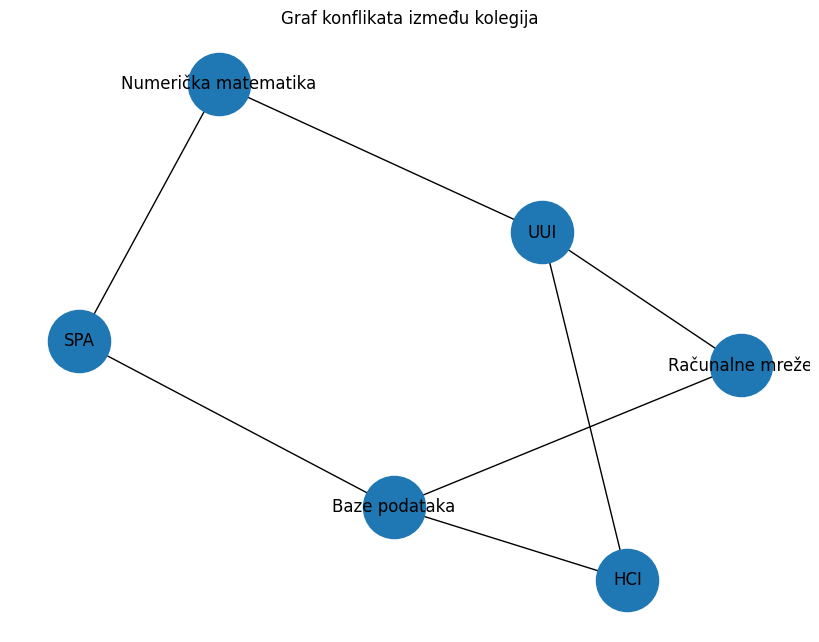

In [ ]:
#.Graph klasu koristimo za instanciranje neusmjerenog grafa
G = nx.Graph()
G.add_nodes_from(courses)
G.add_edges_from(conflicts)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_size=2000, font_size=12)
plt.title("Graf konflikata između kolegija")
plt.show()

### Inicijalizacija CSP problema i dodavanje tvrdih ograničenja

Ova ćelija inicijalizira objekt klase `Problem` iz biblioteke `python-constraint`, kreirane za rješavanje CSP-ova:
*   Za svaki kolegij (varijablu) dodjeljuje se domena svih dostupnih termina (`timeslots`) korištenjem metode `addVariable`.
*   Dodaju se **tvrda ograničenja** (metodom `addConstraint`): Za svaki par kolegija u `conflicts` listi, postavlja se uvjet da njihovi dodijeljeni termini moraju biti različiti (`x != y`, binarno ograničenje).

In [ ]:
problem = Problem()

# Dodavanje varijabli i njihovih domena
for course in courses:
    problem.addVariable(course, timeslots)

# Hard constraints: kolegiji u konfliktu ne smiju biti u istom terminu
for c1, c2 in conflicts:
    problem.addConstraint(lambda x, y: x != y, (c1, c2))

### Pronalaženje svih rješenja

Metoda `problem.getSolutions()` pronalazi sva moguća rješenja koja zadovoljavaju **sva definirana tvrda ograničenja**. Svako rješenje je rječnik (dictionary) gdje su ključevi kolegiji, a vrijednosti dodijeljeni termini.

In [ ]:
solutions = problem.getSolutions()
print("Broj mogućih rješenja:", len(solutions))

Broj mogućih rješenja: 13080


### Prikaz jednog mogućeg rješenja

Ako postoje rješenja (tj. `solutions` lista nije prazna), ova ćelija uzima prvo pronađeno rješenje (element niza sa indeksom 0) i prikazuje ga u obliku `pandas` DataFrame-a. Radi bolje čitljivosti, DataFrame se sortira po terminima.

In [ ]:
if solutions:
    solution = solutions[0]

    df = pd.DataFrame(list(solution.items()), columns=["Course", "Timeslot"])
    df = df.sort_values("Timeslot")

    print("Primjer jednog mogućeg rasporeda:")
    display(df)
else:
    print("Nema rješenja!")


Primjer jednog mogućeg rasporeda:


,Course,Timeslot
0,Baze podataka,Sri 12
1,UUI,Sri 12
2,HCI,Sri 9
3,Numerička matematika,Sri 9
5,Računalne mreže,Sri 9
4,SPA,Uto 12


### Funkcija za formatiranje rasporeda i prikaz u tablici

Ova ćelija definira funkciju `schedule_table` koja uzima jedno rješenje CSP-a (rječnik `course: timeslot`) i pretvara ga u čitljivu pivot tablicu. Prvo metoda `.items` pretvara dict u `view` objekt sa tupleovima a zatim funkcija `list` pretvara objekt u listu tupleova koje DataFrame gleda kao retke tablice. Tablica prikazuje kolegije raspoređene po danima i vremenima, olakšavajući pregled rasporeda.

In [ ]:
def schedule_table(solution):
    data = []
    for course, slot in solution.items():
        day, time = slot.split()
        data.append((day, time, course))

    df = pd.DataFrame(data, columns=["Day", "Time", "Course"])
    pivot = df.pivot_table(index="Time", columns="Day", values="Course", aggfunc=lambda x: ", ".join(x))
    return pivot

if solutions:
    calendar = schedule_table(solutions[0])
    print("Raspored u obliku tablice:")
    display(calendar)

Raspored u obliku tablice:


Day,Sri,Uto
Time,,
12,"Baze podataka, UUI",SPA
9,"HCI, Numerička matematika, Računalne mreže",NaN


### Funkcija za ocjenjivanje rješenja (soft constraints)

Ova ćelija definira funkciju `score_solution` koja primjenjuje **meka ograničenja** na pojedino rješenje. Svako kršenje mekih ograničenja dodaje 'kaznu' (penalizaciju) scoreu:
*   Penalizacija od 5 ako su `UUI` i `Numerička matematika` isti dan.
*   Penalizacija od 3 ako su `HCI` i `Baze podataka` isti dan.

Niži score označava bolje (optimalnije) rješenje prema definiranim mekim ograničenjima.

In [ ]:
def score_solution(sol):
    score = 0

    # Penalizacija ako su UUI i Math isti dan (smatraju se teškim kolegijima)
    ai_day = sol["UUI"].split()[0]
    math_day = sol["Numerička matematika"].split()[0]
    if ai_day == math_day:
        score += 5

    # Penalizacija ako su HCI i Baze podataka isti dan (studenti često slušaju oba)
    hci_day = sol["HCI"].split()[0]
    db_day = sol["Baze podataka"].split()[0]
    if hci_day == db_day:
        score += 3

    return score

### Pronalaženje i prikaz najboljeg rješenja

Ova ćelija prolazi kroz **sva** pronađena rješenja koja zadovoljavaju tvrda ograničenja i za svako izračunava score pomoću funkcije `score_solution`.

Nakon toga, rješenja se sortiraju prema scoreu (od najnižeg do najvišeg), a rješenje s najnižim scoreom se smatra 'najboljim' rasporedom. Na kraju se prikazuje taj najbolji raspored, prvo kao DataFrame, a zatim u formatu tablice.

In [ ]:
if solutions:
    scored = [(score_solution(sol), sol) for sol in solutions]
    scored.sort(key=lambda x: x[0])

    best_score, best_solution = scored[0]

    print("Najbolje rješenje prema soft constraints:")
    print("Score:", best_score)

    df_best = pd.DataFrame(list(best_solution.items()), columns=["Course", "Timeslot"])
    df_best = df_best.sort_values("Timeslot")
    display(df_best)

    print("Najbolji raspored u tablici:")
    display(schedule_table(best_solution))
else:
    print("Nema rješenja!")

Najbolje rješenje prema soft constraints:
Score: 0


,Course,Timeslot
0,Baze podataka,Sri 12
1,UUI,Sri 12
4,SPA,Sri 9
5,Računalne mreže,Sri 9
2,HCI,Uto 12
3,Numerička matematika,Uto 12


Najbolji raspored u tablici:


Day,Sri,Uto
Time,,
12,"Baze podataka, UUI","HCI, Numerička matematika"
9,"SPA, Računalne mreže",NaN
